In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as pl
from collections import defaultdict
from pprint import pprint
import itertools
import random

pl.rcParams['figure.figsize'] = [12, 12]

In [27]:
g = nx.read_graphml('retweet.graphml')
if g.is_directed():
    g = g.to_undirected()
nodes = g.nodes(data=True)
edges = g.edges()
info = nx.info(g)
print(info)
nodes = {k: v for k, v in nodes}
edges = tuple((k, v) for k, v in edges)

Name: 
Type: MultiGraph
Number of nodes: 18470
Number of edges: 60785
Average degree:   6.5820


In [28]:
esample = random.sample(edges, 25)
print("Edge Sample:")
pprint(esample)

nsample = {'left': {}, 'right': {}, '-': {}}
for u, v in esample:
    uclust = g.nodes[u]['cluster']
    vclust = g.nodes[v]['cluster']
    if u not in nsample[uclust]:
        nsample[uclust][u] = tuple(g.neighbors(u))
    if v not in nsample[vclust]:
        nsample[vclust][v] = tuple(g.neighbors(v))

print("Nodes from Edges Sample:")
pprint(nsample, depth=2)

Edge Sample:
[('n5461', 'n12407'),
 ('n12356', 'n16645'),
 ('n3558', 'n10177'),
 ('n3740', 'n14671'),
 ('n12033', 'n14025'),
 ('n6555', 'n15394'),
 ('n4167', 'n15341'),
 ('n5525', 'n7499'),
 ('n3339', 'n12711'),
 ('n764', 'n14553'),
 ('n1126', 'n17445'),
 ('n5010', 'n10255'),
 ('n14358', 'n15141'),
 ('n7406', 'n16397'),
 ('n8190', 'n16282'),
 ('n5081', 'n11150'),
 ('n13014', 'n13456'),
 ('n1209', 'n13417'),
 ('n2031', 'n18451'),
 ('n11993', 'n16260'),
 ('n10277', 'n13580'),
 ('n4367', 'n5008'),
 ('n1110', 'n6438'),
 ('n764', 'n4864'),
 ('n9463', 'n16348')]
Nodes from Edges Sample:
{'-': {},
 'left': {'n10277': (...,),
          'n1110': (...),
          'n11150': (...),
          'n11993': (...),
          'n12033': (...),
          'n12356': (...),
          'n13580': (...),
          'n14025': (...),
          'n15341': (...),
          'n16260': (...),
          'n16282': (...),
          'n16645': (...,),
          'n18451': (...),
          'n2031': (...),
          'n4167': (...)

In [37]:
def ratio_calc(graph, node, sweight=1, oweight=0, nweight=0.5, 
               field='cluster', neutral='-', right='right', left='left', 
               no_alignment_value=None):
    """
    Perform a ratio calculation on given node in graph.
    """
    nbors = tuple(graph.neighbors(node))
    nclust = graph.nodes[node][field]
    
    if nclust == neutral:
        return no_alignment_value
    
    counts = { k: float(len(list(v))) for k,v in itertools.groupby(nbors, key=lambda y: graph.nodes[y][field]) }
    nother = right if nclust == left else left
    ratio = ((sweight * counts.get(nclust, 0)) + (oweight * counts.get(nother, 0)) + (nweight * counts.get(neutral, 0))) \
                / len(nbors)
    return ratio

ratios = { n: ratio_calc(g, n) for n in g.nodes() }
ratios = { k: v for k, v in ratios.items() if v }
#pprint(ratios)
print("n3189", len(list(g.neighbors("n3189"))))

n3189 10


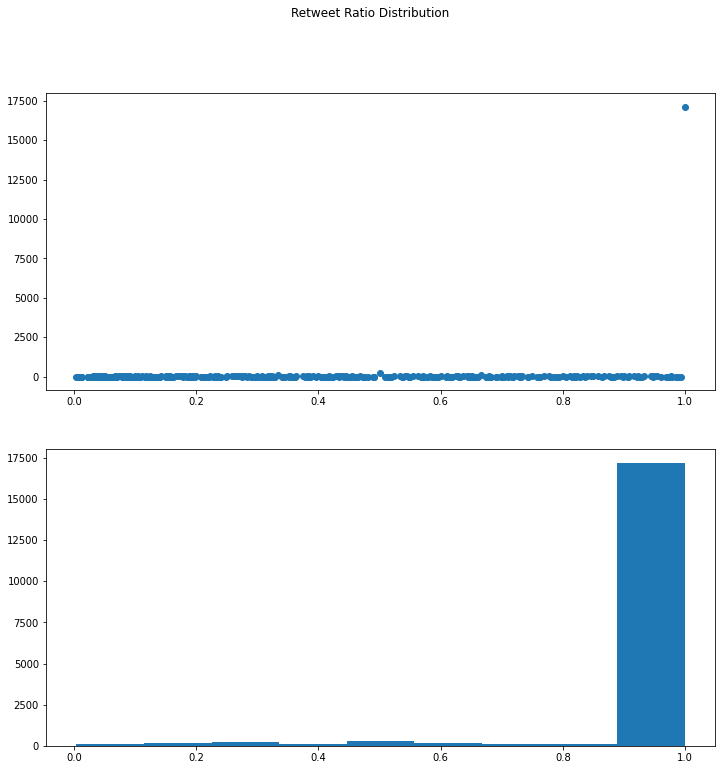

In [36]:
d = { k: len(tuple(v)) for k, v in itertools.groupby(sorted(ratios.values())) }
plot, (ap, bp) = pl.subplots(2)
plot.suptitle('Retweet Ratio Distribution')
ap.scatter(d.keys(), d.values())
bp.hist(ratios.values(), bins=9)
plot.show()